Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 195 files belonging to 5 classes.
Found 85 files belonging to 5 classes.
Epoch 1/20
13/13 [==============================] - 42s 3s/step - loss: 2.4428 - accuracy: 0.3026 - val_loss: 1.3824 - val_accuracy: 0.4588
Epoch 2/20
13/13 [==============================] - 22s 1s/step - loss: 1.0116 - accuracy: 0.6872 - val_loss: 1.0211 - val_accuracy: 0.6118
Epoch 3/20
13/13 [==============================] - 21s 1s/step - loss: 0.4888 - accuracy: 0.8359 - val_loss: 0.9614 - val_accuracy: 0.6941
Epoch 4/20
13/13 [==============================] - 30s 2s/step - loss: 0.2565 - accuracy: 0.9179 - val_loss: 1.0265 - val_accuracy: 0.7412
Epoch 5/20
13/13 [==============================] - 22s 1s/step - loss: 0.1352 - accuracy: 0.9692 - val_loss: 1.1444 - val_accuracy: 0.7765
Epoch 6/20
13/13 [==============================] - 21s 1s/step - loss: 0.0716 - accuracy: 0

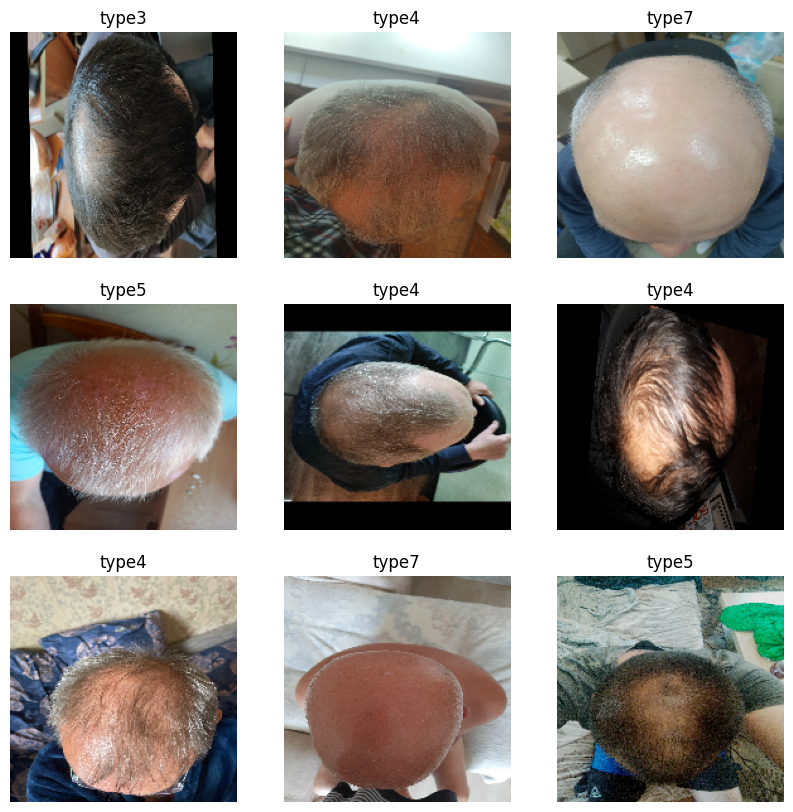

In [5]:
from google.colab import drive
drive.mount('/content/drive')


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_train_path = '/content/drive/MyDrive/dataset/train'
data_test_path = '/content/drive/MyDrive/dataset/val'

img_width = 180
img_height = 180

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, shuffle = True, image_size = (img_width, img_height),
    batch_size = 16,
    validation_split = False
)

data_cat = data_train.class_names

data_val = tf.keras.utils.image_dataset_from_directory(
    data_test_path, shuffle = True, image_size = (img_width, img_height),
    batch_size = 16,
    validation_split = False
)

plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

from tensorflow.keras.models import Sequential

data_train

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)




Text(0.5, 1.0, 'Loss')

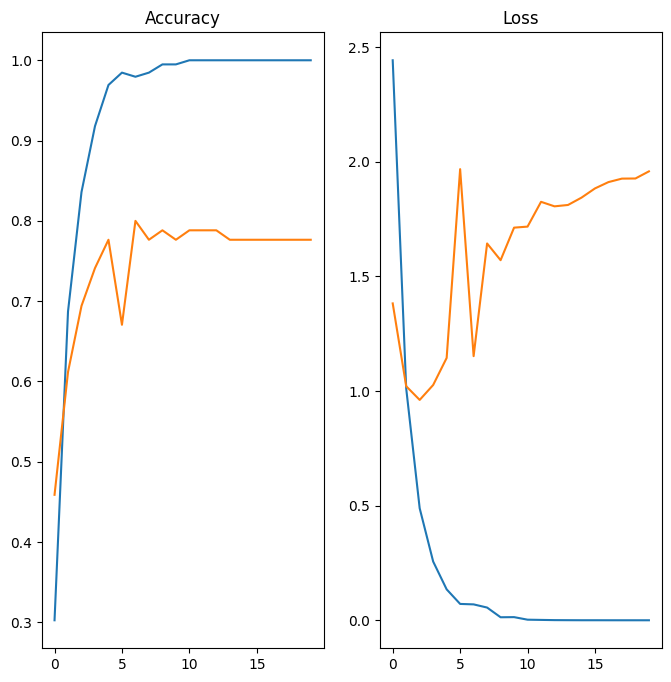

In [6]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

1/1 [==============================] - 0s 274ms/step
Baldness in image 1 is type7 with accuracy of 99.88


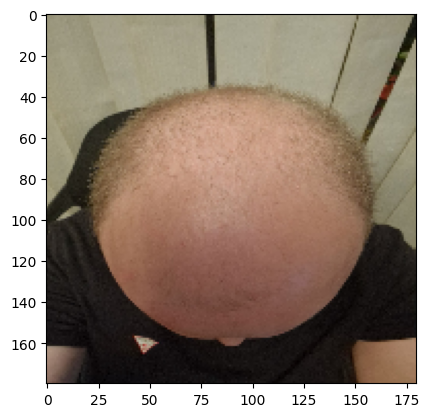

In [7]:
image1 = '/content/17.jpg'
image1 = tf.keras.utils.load_img(image1, target_size=(img_height, img_width))
img_arr1 = tf.keras.utils.img_to_array(image1)
img_bat1 = tf.expand_dims(img_arr1, 0)
predicts1 = model.predict(img_bat1)
score = tf.nn.softmax(predicts1)
plt.imshow(image1)
print('Baldness in image 1 is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))



1/1 [==============================] - 0s 99ms/step
Baldness in image 2 is type4 with accuracy of 95.95


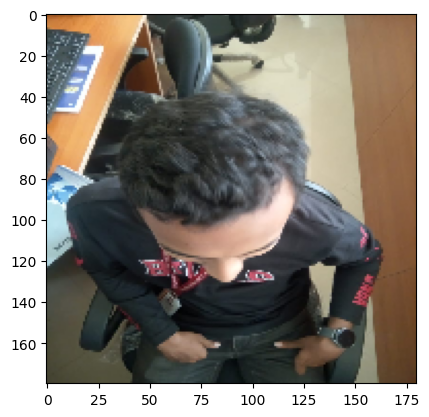

In [ ]:
image2 = '/content/drive/MyDrive/prajwaltop.jpg'
image2 = tf.keras.utils.load_img(image2, target_size=(img_height, img_width))
img_arr2 = tf.keras.utils.img_to_array(image2)
img_bat2 = tf.expand_dims(img_arr2, 0)
predict2 = model.predict(img_bat2)  # Assuming 'model' is defined and loaded elsewhere
score2 = tf.nn.softmax(predict2)
plt.imshow(image2)
print('Baldness in image 2 is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score2)], np.max(score2) * 100))


1/1 [==============================] - 0s 62ms/step


<Figure size 1000x1000 with 0 Axes>

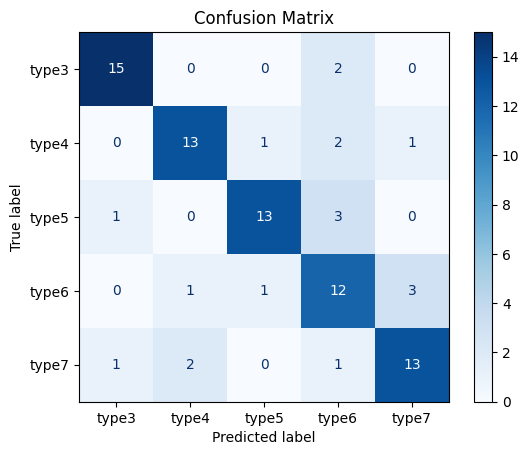

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Assuming you have already trained the model and have `data_val` as your validation dataset
# and `model` as your trained model

# Make predictions on the validation set
y_true = []
y_pred = []

for images, labels in data_val:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=data_cat)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 195 files belonging to 5 classes.
Found 85 files belonging to 5 classes.
Epoch 1/20
13/13 [==============================] - 24s 1s/step - loss: 3.5830e-04 - accuracy: 1.0000 - val_loss: 1.9822 - val_accuracy: 0.7765
Epoch 2/20
13/13 [==============================] - 22s 1s/step - loss: 3.6264e-04 - accuracy: 1.0000 - val_loss: 1.9636 - val_accuracy: 0.7882
Epoch 3/20
13/13 [==============================] - 27s 2s/step - loss: 3.1713e-04 - accuracy: 1.0000 - val_loss: 1.9737 - val_accuracy: 0.7765
Epoch 4/20
13/13 [==============================] - 22s 1s/step - loss: 4.1675e-04 - accuracy: 1.0000 - val_loss: 2.0160 - val_accuracy: 0.7765
Epoch 5/20
13/13 [==============================] - 23s 1s/step - loss: 2.7037e-04 - accuracy: 1.0000 - val_loss: 2.0461 - val_accuracy: 0.7765
Epoch 6/20
13/13 [==============================] - 24s 1s/step - loss: 2.6838e-04 - accuracy: 1.0000 - val_loss: 2.0486 - val_accuracy: 0.7765
Epoch 7/20
13/13 [==============================] - 21s 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (5) greater than or equal to 'n_classes' (5) will result in a perfect score and is therefore meaningless.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

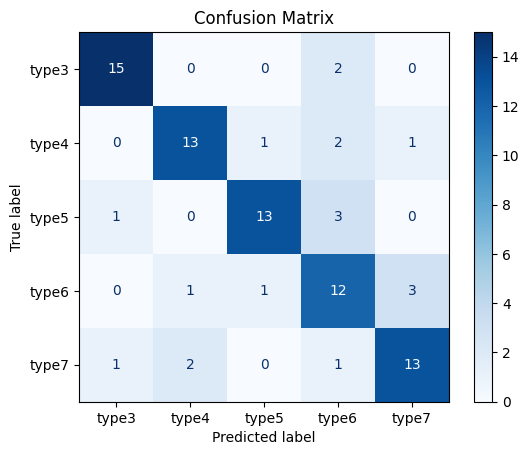

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, top_k_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Custom callback to log metrics
class MetricsLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs = []
        self.train_loss = []
        self.train_accuracy = []
        self.val_loss = []
        self.val_accuracy = []
        self.lr = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch + 1)
        self.train_loss.append(logs.get('loss'))
        self.train_accuracy.append(logs.get('accuracy'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.lr.append(self.model.optimizer.lr.numpy())

    def get_logs(self):
        return pd.DataFrame({
            'epoch': self.epochs,
            'train/loss': self.train_loss,
            'metrics/accuracy_top1': self.train_accuracy,
            'val/loss': self.val_loss,
            'val/accuracy_top1': self.val_accuracy,
            'lr/pg0': self.lr,
            'lr/pg1': self.lr,
            'lr/pg2': self.lr
        })

# Load the trained model
model = tf.keras.models.load_model('/content/Baldness_classifier.keras')

# Initialize the custom callback
metrics_logger = MetricsLogger()

# Define the path to the training and validation datasets
data_train_path = '/content/drive/MyDrive/dataset/train'
data_test_path = '/content/drive/MyDrive/dataset/val'

# Load the datasets
img_width = 180
img_height = 180
batch_size = 16

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, shuffle=True, image_size=(img_width, img_height),
    batch_size=batch_size, validation_split=False
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_test_path, shuffle=True, image_size=(img_width, img_height),
    batch_size=batch_size, validation_split=False
)

# Re-train the model with the custom callback to log metrics for all epochs
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, callbacks=[metrics_logger])

# Retrieve the logged metrics
logs_df = metrics_logger.get_logs()

# Display the logs
print(logs_df)

# Save the metrics to a CSV file if needed
logs_df.to_csv('/content/metrics_log.csv', index=False)

# Make predictions on the validation set
y_true = []
y_pred = []
all_predictions = []

for images, labels in data_val:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    all_predictions.extend(predictions)

# Compute accuracy
accuracy_top1 = accuracy_score(y_true, y_pred)
accuracy_top5 = top_k_accuracy_score(y_true, all_predictions, k=5)

print(f'Top-1 Accuracy: {accuracy_top1}')
print(f'Top-5 Accuracy: {accuracy_top5}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=data_train.class_names)

plt.figure(figsize=(10, 10))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

